In [54]:
import umap
import math
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.decomposition import DictionaryLearning
from scipy.stats import binom_test

import matplotlib.pyplot as plt

import matplotlib.image as mpimg
import seaborn as sns

from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_predict

from contrastive.evaluation.train_multiple_classifiers import compute_auc

In [55]:
# test model
test_model = "/neurospin/dico/data/deep_folding/papers/ipmi2023/models/contrastive/trained_on_HCP_half_2/chosen_model/chosen_model"
# test_model = "/neurospin/dico/data/deep_folding/papers/ipmi2023/models/beta-VAE/n_10/#2"
dataset_train = 'cingulate_HCP_half_2_NEOFAC_C'

# load the data
train_df = pd.read_csv(test_model+'/'+dataset_train+'_embeddings/train_val_embeddings.csv', index_col=0)
train_df.sort_index(inplace=True)
len(train_df)

551

In [115]:
dataset_test = 'cingulate_HCP_full_NEOFAC_C'

test_df = pd.read_csv(test_model+'/'+dataset_test+'_embeddings/cross_val_effective_embeddings.csv', index_col=0)
test_df.sort_index(inplace=True)

# load the labels
prediction_df = pd.read_csv(test_model+'/'+dataset_test+'_embeddings/cross_val_predicted_labels.csv', index_col=0)
prediction_df.sort_index(inplace=True)
len(test_df)

1106

In [116]:
prediction_df.iloc[-5:,:]

,label,predicted_0,predicted_1,predicted_2,predicted_3,predicted_4,predicted_5,predicted_6,predicted_7,predicted_8,...,predicted_243,predicted_244,predicted_245,predicted_246,predicted_247,predicted_248,predicted_249,median_pred,mean_pred,average_model
Subject,,,,,,,,,,,,,,,,,,,,,
992774,39.0,0.544182,0.534911,0.533718,0.527717,0.527842,0.532806,0.532596,0.528870,0.527885,...,0.541007,0.527418,0.538830,0.529809,0.533189,0.514058,0.530622,0.533758,0.533494,0.532144
993675,37.0,0.514745,0.545083,0.548913,0.574427,0.565368,0.548898,0.551278,0.569211,0.564238,...,0.521224,0.576209,0.529335,0.562215,0.550774,0.612222,0.556684,0.547009,0.548743,0.554359
994273,29.0,0.528803,0.540233,0.541669,0.552179,0.547491,0.541226,0.542373,0.549994,0.546920,...,0.530668,0.552971,0.533866,0.546775,0.542391,0.565455,0.544264,0.540830,0.541481,0.543771
995174,41.0,0.534341,0.538319,0.538810,0.543388,0.540428,0.538198,0.538857,0.542401,0.540078,...,0.534390,0.543788,0.535653,0.540676,0.539082,0.547005,0.539359,0.538252,0.538612,0.539590
996782,35.0,0.518033,0.543950,0.547220,0.569229,0.561192,0.547105,0.549198,0.564721,0.560193,...,0.523433,0.570779,0.530395,0.558608,0.548815,0.601264,0.553782,0.545550,0.547037,0.551885


In [117]:
# print(train_df.head())
# print(test_df.head())
mean_label = prediction_df.label.mean()
def f(x):
    return 1 if x>=mean_label else 0
prediction_df_continuous = prediction_df.copy()
prediction_df.loc[:,"label"] = prediction_df.label.apply(f)
# prediction_df['label'] = np.random.permutation(prediction_df['label'].values)
prediction_df.index = prediction_df.index.astype(np.int64)
print(mean_label)

34.48191681735985


In [58]:
prediction_df.head()

,label,predicted_0,predicted_1,predicted_2,predicted_3,predicted_4,predicted_5,predicted_6,predicted_7,predicted_8,...,predicted_243,predicted_244,predicted_245,predicted_246,predicted_247,predicted_248,predicted_249,median_pred,mean_pred,average_model
Subject,,,,,,,,,,,,,,,,,,,,,
100206,0,0.500000,0.545832,0.511126,0.518482,0.510937,0.532778,0.540902,0.535986,0.534060,...,0.540732,0.522403,0.549788,0.532984,0.527355,0.546415,0.555782,0.534046,0.533972,0.526872
100307,1,0.613436,0.522580,0.585469,0.576527,0.587817,0.546535,0.530392,0.540008,0.543915,...,0.530261,0.566842,0.512621,0.545676,0.558064,0.519480,0.500000,0.543953,0.543852,0.557588
100408,0,0.553342,0.534885,0.546241,0.545889,0.547250,0.539264,0.535952,0.537882,0.538706,...,0.535800,0.543378,0.532299,0.538968,0.541843,0.533736,0.528378,0.538708,0.538680,0.541364
100610,1,0.500000,0.546164,0.510057,0.517647,0.509831,0.532581,0.541052,0.535929,0.533919,...,0.540882,0.521765,0.550319,0.532802,0.526915,0.546799,0.556613,0.533898,0.533828,0.526431
101006,1,0.543582,0.536879,0.539861,0.540908,0.540653,0.538084,0.536853,0.537537,0.537860,...,0.536699,0.539565,0.535486,0.537879,0.539208,0.536046,0.533375,0.537850,0.537833,0.538728


In [59]:
len(test_df)

1106

## correlation functions

In [60]:
def get_model_by_quality(labels_df, q=0.5):
    aucs = labels_df.apply(compute_auc, args=[labels_df.label])
    aucs = aucs[aucs.index != 'label']
    model_auc = aucs.quantile(q=q, interpolation='nearest')
    aucs = aucs[aucs == model_auc]
    return(aucs.index[0], model_auc)

In [61]:
def cross_correlation(model_path, dataset='cingulate_ACCpatterns_1'):
    # load the data
    data_df = pd.read_csv(model_path+'/'+dataset+'_embeddings/full_embeddings.csv', index_col=0)
    data_df.sort_index(inplace=True)

    prediction_df = pd.read_csv(model_path+'/'+dataset+'_embeddings/cross_val_predicted_labels.csv', index_col=0)
    prediction_df.sort_index(inplace=True)

    full_df = pd.merge(prediction_df[['label']], data_df, left_index=True, right_index=True)

    fig, axs = plt.subplots(1, 4, figsize=(30,10)) 

    latent_df = full_df.iloc[:,1:]
    corr = latent_df.corr()
    axs[0] = sns.heatmap(
            corr, 
            vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200),
            square=True,
            ax=axs[0]
            )

    latent_df = full_df[full_df.label == 0].iloc[:,1:]
    corr0 = latent_df.corr()
    axs[1] = sns.heatmap(
            corr0, 
            vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200),
            square=True,
            ax=axs[1]
            )

    latent_df = full_df[full_df.label == 1].iloc[:,1:]
    corr1 = latent_df.corr()
    axs[2] = sns.heatmap(
            corr1, 
            vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200),
            square=True,
            ax=axs[2]
            )

    corrdiff = (corr1-corr0)
    axs[3] = sns.heatmap(
            corrdiff, 
            vmin=corrdiff.min().min(), vmax=corrdiff.max().max(), center=0,
            cmap=sns.diverging_palette(20, 220, n=200),
            square=True,
            ax=axs[3]
            )


In [62]:
def visualize_each_variable(model_path, display: str, display_err: bool, normalize=True, verbose=False, dataset='cingulate_ACCpatterns_1'):
    '''
    display: str -> takes the values '0', '1', 'all'
    '''
    # load the data
    data_df = pd.read_csv(model_path+'/'+dataset+'_embeddings/full_embeddings.csv', index_col=0)
    data_df.sort_index(inplace=True)

    prediction_df = pd.read_csv(model_path+'/'+dataset+'_embeddings/cross_val_predicted_labels.csv', index_col=0)
    prediction_df.sort_index(inplace=True)

    full_df = pd.merge(prediction_df[['label']], data_df, left_index=True, right_index=True)

    # Chooses to display only labels '0', '1' or all
    if display == '0':
        full_df = full_df[full_df.label == 0]
    elif display == '1':
        full_df = full_df[full_df.label == 1]
    
    # Some prints if verbose true
    if verbose:
        print("Prediction df:")
        print(prediction_df.iloc[:2, :2])
        print(len(prediction_df))
        print(prediction_df[['label']].shape)
        print("Data df:")
        print(len(data_df))
        print(data_df.iloc[:2, :2])
        print(data_df.shape)
        print("Full df:")
        print(len(full_df))
        print(full_df.iloc[:2, :2])
        print(full_df.shape)

    N, D = full_df.shape
    D = D-1 # There is the label column added

    # Initializes plot
    plt.figure(figsize=(16,12))

    # Builds x coordinates for scatter plot
    x = np.reshape(np.arange(D), (1,D))
    x = np.repeat(x, N, axis=0)

    # Replaces labels 0, 1 with colors
    label_df = full_df[['label']].copy()
    label_df['label'] = label_df['label'].astype("str")
    label_df['label'] = label_df['label'].replace('0', 'b')
    label_df['label'] = label_df['label'].replace('1', 'r')

    # Builds colors to match pyplot requirements
    colors = label_df['label'].values
    colors = np.reshape(colors, (1,N))
    colors = np.repeat(colors, D, axis=0)
    colors = colors.T
    print('x, full_df and colors shapes: ', x.shape, full_df.shape, colors.shape)
    colors = np.reshape(colors, (N*D,))

    # latent (doesn't take the first column, which is the label)
    latent_df = full_df.iloc[:,1:]
    mu = latent_df.mean()
    std = latent_df.std()
    if normalize == True:
        latent_df = (latent_df-mu)/std

    # Actual plotting of each point
    plt.scatter(x, latent_df, c=colors, marker='.')

    # Computes averages
    if display == "all":
        # Computes average for label=0
        x = np.arange(D)
        label0_df = full_df[full_df['label'] == 0].iloc[:,1:]
        if normalize == True:   
            label0_df = (label0_df-mu)/std
        mean_df = label0_df.mean()
        e_df = label0_df.std()
        print(x.shape, mean_df.shape, e_df.shape)
        if display_err:
            plt.errorbar(x, mean_df, yerr=e_df, color='blue', linestyle='None', elinewidth=4, marker='s', markersize=15, markerfacecolor='None', markeredgewidth=3, solid_capstyle='projecting', capsize=10)
        else:
            plt.plot(x, mean_df, color='blue', linestyle='None', marker='s', markersize=15, markerfacecolor='None', markeredgewidth=3)

        # Computes average for label=1
        label1_df = full_df[full_df['label'] == 1].iloc[:,1:]
        if normalize == True:   
            label1_df = (label1_df-mu)/std
        mean_df = label1_df.mean()
        e_df = label1_df.std()
        if display_err:
            plt.errorbar(x, mean_df, yerr=e_df, color='red', linestyle='None', elinewidth=4, marker='s', markersize=15, markerfacecolor='None', markeredgewidth=3,solid_capstyle='projecting', capsize=10)
        else:
            plt.plot(x, mean_df, color='red', linestyle='None', marker='s', markersize=15, markerfacecolor='None', markeredgewidth=3)

    # Shows the computed plot
    plt.show()

    return 

In [63]:
def full_visualization(model_path, dataset='cingulate_ACCpatterns_1'):
    plt.figure(figsize=(12.8, 9.6))
    fig = plt.imshow(mpimg.imread(model_path+"/"+dataset+"_embeddings/cross_val_ROC_curves.png"))
    plt.axis('off')
    plt.show()
    return visualize_umaps(model_path, dataset)

In [64]:
# test model
# visual_embs = full_visualization(test_model)

## Visualize each variable of the latent

x, full_df and colors shapes:  (171, 10) (171, 11) (171, 10)
(10,) (10,) (10,)


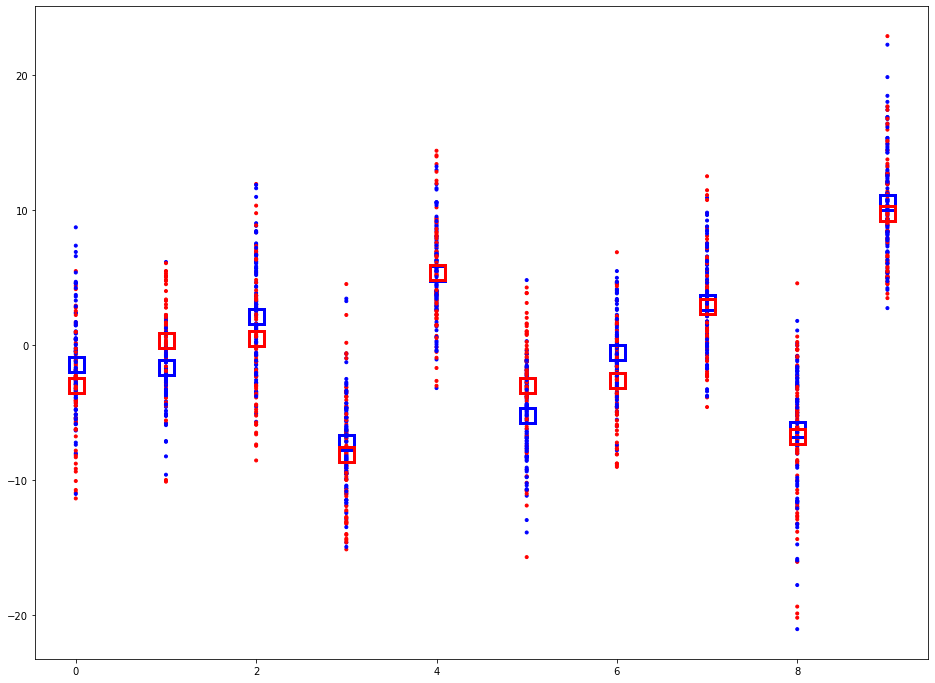

In [65]:
visualize_each_variable(test_model, display='all', display_err=False, normalize=False, verbose=False)

In [66]:
def do_pca(model_path, dataset=dataset_test):
    # load the data
    data_df = pd.read_csv(model_path+'/'+dataset+'_embeddings/full_embeddings.csv', index_col=0)
    data_df.sort_index(inplace=True)

    prediction_df = pd.read_csv(model_path+'/'+dataset+'_embeddings/cross_val_predicted_labels.csv', index_col=0)
    prediction_df.sort_index(inplace=True)

    full_df = pd.merge(prediction_df[['label']], data_df, left_index=True, right_index=True)

    # Makes PCA over all dataframe
    latent_df = full_df.iloc[:,1:]
    latent_df_normalized = (latent_df - latent_df.mean()) / latent_df.std()
    n_components = latent_df.shape[1]
    pca = PCA(n_components=n_components)
    transformed = pca.fit_transform(latent_df_normalized)

    # Transforms over label0 dataframe
    label0_df = full_df[full_df['label'] == 0].iloc[:,1:]
    label0_df = (label0_df - latent_df.mean()) / latent_df.std()
    transformed0 = pca.transform(label0_df)
    mean0 = np.mean(transformed0, axis=0)
    print(mean0.shape)

    # Transforms over label1 dataframe
    label1_df = full_df[full_df['label'] == 1].iloc[:,1:]
    label1_df = (label1_df - latent_df.mean()) / latent_df.std()
    transformed1 = pca.transform(label1_df)
    mean1 = np.mean(transformed1, axis=0)
    print(mean1.shape)

    idx = np.arange(n_components)+1
    explained_variance = pca.explained_variance_ratio_
    cum_explained_variance = np.cumsum(explained_variance)
    df_explained_variance = pd.DataFrame([explained_variance, cum_explained_variance], 
                                     index=['explained variance', 'cumulative'], 
                                     columns=idx).T

    limit_df = n_components

    #make scree plot
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['axes.edgecolor'] = 'black'
    fig, axs = plt.subplots(1, 2, figsize=(30,10)) 
    [t.set_color('white') for t in axs[0].xaxis.get_ticklabels()]
    [t.set_color('white') for t in axs[0].yaxis.get_ticklabels()]
    axs[0].set_title('Explained variance across principal components', fontsize=14)
    axs[0].set_xlabel('Principal component', fontsize=12)
    axs[0].set_ylabel('Explained variance', fontsize=12)
    sns.barplot(ax=axs[0], x=idx[:limit_df], y='explained variance', data=df_explained_variance, palette='summer')
    axs[0] = axs[0].twinx()
    axs[0].grid(False)
    axs[0].set_ylabel('Cumulative', fontsize=14)
    sns.lineplot(ax=axs[0], x=idx[:limit_df]-1, y='cumulative', data=df_explained_variance, color='#fc8d59')

    N, D = transformed.shape
    # Builds x coordinates for scatter plot
    x = np.reshape(np.arange(D), (1,D))
    x = np.repeat(x, transformed0.shape[0], axis=0)
    axs[1].scatter(x, transformed0, c='blue', marker='.')
    x = np.reshape(np.arange(D), (1,D))
    x = np.repeat(x, transformed1.shape[0], axis=0)
    axs[1].scatter(x, transformed1, c='red', marker='.')
    x = np.arange(D)
    axs[1].plot(x, mean0, color='blue', linestyle='None', marker='s', markersize=15, markerfacecolor='None', markeredgewidth=3)
    axs[1].plot(x, mean1, color='red', linestyle='None', marker='s', markersize=15, markerfacecolor='None', markeredgewidth=3)

    plt.show()


In [67]:
def do_dictionary_learning(data_df, n_components=10, transform_n_nonzero_coefs=1):
    data_df_local = data_df.copy()
    full_df_local = pd.DataFrame()
    # Makes dictionary learning over all embeddings
    latent_df = data_df_local.iloc[:,:]
    latent_df_normalized = (latent_df - latent_df.mean()) / latent_df.std()
    n_components = n_components
    dict_learner = DictionaryLearning(n_components=n_components,
                                      transform_n_nonzero_coefs=transform_n_nonzero_coefs,
                                      alpha=1)
    transformed = dict_learner.fit_transform(latent_df_normalized)

    # Adds transform to full_df
    columns = ['trans_'+str(x) for x in range(n_components)]
    transformed_df_local = pd.DataFrame(transformed, columns=columns)
    transformed_df_local.index = data_df_local.index
    full_df_local = pd.merge(data_df_local, transformed_df_local, left_index=True, right_index=True)

    return full_df_local, transformed_df_local, dict_learner

In [68]:
def plot_patterns(prediction_df, transformed_df, random=False):
    # Makes local copy
    prediction_df_local = prediction_df.copy()
    transformed_df_local = transformed_df.copy()

    if random:
        prediction_df_local['label'] = np.random.permutation(prediction_df_local['label'].values)
    full_df_local = pd.merge(prediction_df_local[['label']], transformed_df_local, left_index=True, right_index=True)

    print(full_df_local.head())

    # Transforms over label0 dataframe
    label0_df = full_df_local[full_df_local['label'] == 0].iloc[:,1:]
    transformed0 = label0_df.values

    # Transforms over label1 dataframe
    label1_df = full_df_local[full_df_local['label'] == 1].iloc[:,1:]
    transformed1 = label1_df.values

    fig, axs = plt.subplots(1, 1, figsize=(10,7)) 

    _, D = transformed0.shape

    x = np.reshape(np.arange(D), (1,D))
    x = np.repeat(x, transformed0.shape[0], axis=0)
    axs.scatter(x, transformed0, c='blue', marker='.')
    x = np.reshape(np.arange(D), (1,D))
    x = np.repeat(x, transformed1.shape[0], axis=0)
    axs.scatter(x, transformed1, c='red', marker='.')

    x = np.arange(D)

    masked0 = np.ma.masked_equal(transformed0, 0.)
    mean0 = masked0.mean(axis=0)
    axs.plot(x, mean0, color='blue', linestyle='None', marker='s', markersize=15, markerfacecolor='None', markeredgewidth=3)

    masked1 = np.ma.masked_equal(transformed1, 0.)
    mean1 = masked1.mean(axis=0)
    axs.plot(x, mean1, color='red', linestyle='None', marker='s', markersize=15, markerfacecolor='None', markeredgewidth=3)

    plt.show()

In [69]:
def return_predictions(prediction_df, transformed_df, random=False):
    # Initializes
    prediction_df_local = prediction_df.copy()
    transformed_df_local = transformed_df.copy()
    n_patterns = len(transformed_df_local.columns)
    res = np.zeros(2*n_patterns)

    # Makes random permutation to produce random label
    if random:
        prediction_df_local['label'] = np.random.permutation(prediction_df_local['label'].values)

    full_df_local = pd.merge(prediction_df_local[['label']], transformed_df_local, left_index=True, right_index=True)

    # Makes prediction for each pattern
    for i, c in enumerate(transformed_df_local.columns):
        df = full_df_local[full_df_local[c] < 0.]
        res[2*i] = df['label'].mean()
        df = full_df_local[full_df_local[c] > 0.]
        res[2*i+1] = df['label'].mean()

    return res

def plot_predictions(prediction_df, transformed_df):
    prediction_df_local = prediction_df.copy()
    transformed_df_local = transformed_df.copy()
    n_patterns = len(transformed_df_local.columns)
    x = np.arange(2*n_patterns)
    res_random = np.zeros((20, 2*n_patterns))

    # Loads labels
    mean_label = prediction_df_local['label'].mean()
    print(f"Mean label = {mean_label}")

    # Computes pattern prediction
    res = return_predictions(prediction_df_local, transformed_df_local)
    for i in range(20):
        res_random[i,:] = return_predictions(prediction_df_local, transformed_df_local, True)
    
    for i in range(20):
        plt.scatter(x, res_random[i], c='grey')

    plt.scatter(x, res, c='red')
    plt.plot(mean_label*np.ones(2*n_patterns))
    plt.ylim((0,1))
    return res   

In [70]:
def return_sum(prediction_df, transformed_df, random=False):
    # Initializes
    prediction_df_local = prediction_df.copy()
    transformed_df_local = transformed_df.copy()
    n_patterns = len(transformed_df_local.columns)
    res_sum = np.zeros(2*n_patterns)
    res_len = np.zeros(2*n_patterns)

    full_df = pd.merge(prediction_df_local[['label']], transformed_df_local, left_index=True, right_index=True)

    # Makes prediction for each pattern
    for i, c in enumerate(transformed_df_local.columns):
        df = full_df[full_df[c] < 0.]
        res_sum[2*i] = df['label'].sum()
        res_len[2*i] = len(df)
        df = full_df[full_df[c] > 0.]
        res_sum[2*i+1] = df['label'].sum()
        res_len[2*i+1] = len(df)

    return res_sum, res_len


def do_t_test(prediction_df, transformed_df, show=True, nb_components=10):
    prediction_df_local = prediction_df.copy()
    transformed_df_local = transformed_df.copy()
    n_patterns = len(transformed_df_local.columns)
    x = np.arange(2*n_patterns)
    res_p = np.zeros(2*n_patterns)

    # Mean labels
    mean_label = prediction_df_local['label'].mean()
    # print(f"Mean label = {mean_label}")

    # Computes pattern prediction
    res_sum, res_len = return_sum(prediction_df_local, transformed_df_local)
    
    for i in range(2*n_patterns):
        res_p[i] = binom_test(res_sum[i], n=res_len[i], p=mean_label, alternative='two-sided')

    if show:
        plt.scatter(x, -np.log10(res_p))
        plt.plot(-np.log10(0.05/(2*nb_components))*np.ones(2*n_patterns))

    return res_p   

In [71]:
def give_number_relevant_subjects_accuracy(prediction_df, transformed_df, res_p, show=True, nb_components=10):
    prediction_df_local = prediction_df.copy()
    transformed_df_local = transformed_df.copy()

    df = pd.merge(prediction_df_local[['label']], transformed_df_local, left_index=True, right_index=True)
    nb_subjects = np.zeros(len(res_p))
    nb_subjects_relevant = 0
    exact_nb_subjects_relevant = 0
    log_p_nb_subjects = 0
    max_auc_score = 0.0
    auc_score = np.zeros(len(res_p))
    # print(len(df.columns))
    for i in range(1,len(df.columns)):
        # print(df.iloc[:,[i]].columns)
        d = df[df.iloc[:,i] < 0.]
        d = d.copy()
        if 2.*d.label.sum() < (len(d.label)):
            d.iloc[:,i] = 0
        else:
            d.iloc[:,i] = 1
        # print(np.unique(d.label.values).shape)
        nb_subjects[2*i-2] = len(d)
        auc_score[2*i-2] = accuracy_score(d.label, d.iloc[:,i])
        if 2.*d.label.sum() < (len(d.label)):
            exact_nb_subjects = len(d.label)-d.label.sum()
        else:
            exact_nb_subjects = d.label.sum()
        
        if res_p[2*i-2] < 0.05/nb_components:
            nb_subjects_relevant += nb_subjects[2*i-2]
            max_auc_score = max(auc_score[2*i-2], max_auc_score)
            exact_nb_subjects_relevant += exact_nb_subjects
            log_p_nb_subjects += -np.log10(res_p[2*i-2])*exact_nb_subjects

        d = df[df.iloc[:,i] > 0.]
        d = d.copy()
        if 2.*d.label.sum() < (len(d.label)):
            d.iloc[:,i] = 0
        else:
            d.iloc[:,i] = 1
        nb_subjects[2*i-1] = len(d)
        auc_score[2*i-1] = accuracy_score(d.label, d.iloc[:,i])
        if 2.*d.label.sum() < (len(d.label)):
            exact_nb_subjects = len(d.label)-d.label.sum()
        else:
            exact_nb_subjects = d.label.sum()
        
        if res_p[2*i-1] < 0.05/nb_components:
            nb_subjects_relevant += nb_subjects[2*i-1]
            max_auc_score = max(auc_score[2*i-1], max_auc_score)
            exact_nb_subjects_relevant += exact_nb_subjects
            log_p_nb_subjects += -np.log10(res_p[2*i-2])*exact_nb_subjects
            
    # print(d)
    if show:
        x = np.arange(len(res_p))
        plt.scatter(x, auc_score)
        plt.ylabel('accuracy_score')
        # plt.scatter(res_p, auc_score)
        # plt.xlabel('p value')
        # plt.ylabel('auc_score')
    return nb_subjects_relevant, max_auc_score, exact_nb_subjects_relevant, log_p_nb_subjects

In [72]:
def test_dictionary_learning(dict_learner, test_df, n_components):
    test_df_local = test_df.copy()
    full_df_local = pd.DataFrame()
    latent_df = test_df_local.iloc[:,:]
    latent_df_normalized = (latent_df - latent_df.mean()) / latent_df.std()
    transformed = dict_learner.transform(latent_df_normalized)

    # Adds transform to full_df
    columns = ['trans_'+str(x) for x in range(n_components)]
    transformed_df_local = pd.DataFrame(transformed, columns=columns)
    transformed_df_local.index = test_df_local.index
    full_df_local = pd.merge(test_df_local, transformed_df_local, left_index=True, right_index=True)

    return full_df_local, transformed_df_local


## Non-zeros=1, nb_components=4

In [73]:
full_df, transformed_train_df, dict_learner = do_dictionary_learning(data_df=train_df, n_components=4, transform_n_nonzero_coefs=1)

In [74]:
full_df, transformed_df = test_dictionary_learning(dict_learner=dict_learner, test_df=test_df, n_components=4)

In [102]:
dict_learner.components_

array([[-0.21185369,  0.46467701, -0.18048735, -0.4818397 ,  0.01153796,
         0.15896408, -0.2441136 , -0.2193248 ,  0.43762107, -0.38708964],
       [-0.41511192, -0.01686249,  0.52224201, -0.30374645,  0.17525728,
        -0.19102198,  0.11543515,  0.27666442,  0.53428387,  0.14094996],
       [-0.19446737,  0.34951643,  0.03611421, -0.31079097, -0.20594686,
         0.68988659, -0.22620195, -0.39695522,  0.07577726,  0.09635798],
       [-0.03269238,  0.1307042 ,  0.36371684, -0.10255772,  0.47405379,
        -0.09771276,  0.43010918,  0.36135563, -0.02768688,  0.53705349]])

In [75]:
full_df.head()

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,trans_0,trans_1,trans_2,trans_3
ID,,,,,,,,,,,,,,
100206,8.394083,-4.838112,6.458366,-3.329373,10.817842,-12.612897,2.753505,7.109221,-12.640517,19.555060,0.000000,0.000000,-2.772519,0.0
100307,-7.836296,-0.375096,6.216552,-10.061766,7.491416,-5.847349,0.339369,6.664896,-1.465991,11.891362,0.000000,2.230304,0.000000,0.0
100408,-0.053095,-2.919907,-3.839787,-6.310361,0.392095,-7.196580,0.992875,5.049739,-10.221111,13.107022,0.000000,0.000000,-0.734586,0.0
100610,2.791291,-0.324490,-0.906039,2.048596,6.537894,-4.125042,-8.220337,3.290864,-16.226452,10.390056,0.000000,-1.866419,0.000000,0.0
101006,1.712571,-5.799995,4.553103,-0.968306,-1.620303,-2.390229,-2.943960,4.531745,-18.519890,21.366726,-2.559208,0.000000,0.000000,0.0


         label   trans_0   trans_1   trans_2  trans_3
Subject                                              
100206       0  0.000000  0.000000 -2.772519      0.0
100307       1  0.000000  2.230304  0.000000      0.0
100408       0  0.000000  0.000000 -0.734586      0.0
100610       1  0.000000 -1.866419  0.000000      0.0
101006       1 -2.559208  0.000000  0.000000      0.0


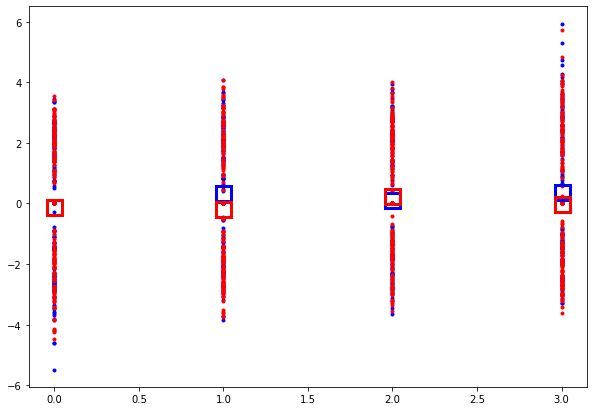

In [76]:
plot_patterns(prediction_df, transformed_df, random=False)

In [77]:
# plot_patterns(prediction_df, transformed_df, random=True)

In [78]:
def plot_patterns_separated(prediction_df, transformed_df, random=False):
    # Makes local copy
    prediction_df_local = prediction_df.copy()
    transformed_df_local = transformed_df.copy()

    if random:
        prediction_df_local['label'] = np.random.permutation(prediction_df_local['label'].values)
    full_df_local = pd.merge(prediction_df_local[['label']], transformed_df_local, left_index=True, right_index=True)

    l = len(full_df_local)
    d = len(full_df_local.columns)
    res = pd.DataFrame(np.zeros((l,3)), index=full_df_local.index, columns=["val", "label", "pat"])
    patterns = ["Ap", "Am", "Bp", "Bm", "Cp", "Cm", "Dp", "Dm"]

    for index, row in transformed_df_local.iterrows():
        idx_nonzero = int(np.nonzero(row.values)[0])
        val_nonzero = row.iloc[idx_nonzero]
        res.loc[index, "val"] = np.abs(val_nonzero)
        res.loc[index, "label"] = prediction_df_local.loc[index, "label"]
        if val_nonzero > 0.:
            res.loc[index, "pat"] = patterns[2*idx_nonzero]
        else:
            res.loc[index, "pat"] = patterns[2*idx_nonzero+1]

    res.sort_values(ascending=True, by='pat', inplace=True)

    f, ax = plt.subplots(1, 1, figsize=(10, 5))
    # g = sns.pointplot(data=res, x=res.pat, y="val", hue = "label", alpha=[0.5,0.5], palette=['blue', 'red'], markers=['v', 's'], scale=2, linestyles=['None', 'None'], ax=ax)
    # plt.setp(g.collections, alpha=0.5)
    # plt.setp(g.lines, alpha=.5) 
    sns.stripplot(data=res[res.label==0], x=res.pat, y="val", hue = "label", marker='v', palette=['blue'], size=7, jitter=.2, ax=ax)
    sns.stripplot(data=res[res.label==1], x=res.pat, y="val", hue = "label", marker='s', palette=['red'], size=7, jitter=.2, ax=ax)
    
    handles, labels = ax.get_legend_handles_labels()
    ax.legend([handles[1], handles[0]], ["paracingular", "no paracingular"], labelspacing=2)

    plt.show()

    return res

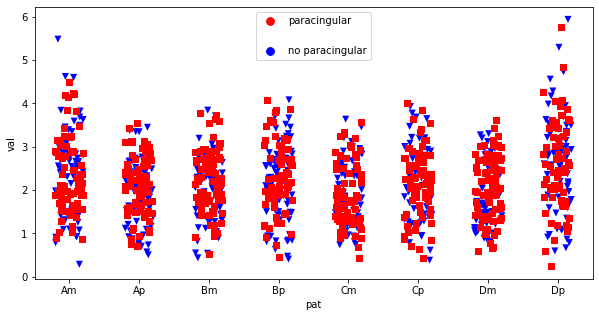

In [79]:
res_df = plot_patterns_separated(prediction_df, transformed_df)

In [80]:
def plot_patterns_separated_without_labels(transformed_df, random=False):
    # Makes local copy
    transformed_df_local = transformed_df.copy()
    full_df_local = transformed_df_local

    l = len(full_df_local)
    d = len(full_df_local.columns)
    res = pd.DataFrame(np.zeros((l,3)), index=full_df_local.index, columns=["val", "label", "pat"])
    patterns = ["Ap", "Am", "Bp", "Bm", "Cp", "Cm", "Dp", "Dm"]

    for index, row in transformed_df_local.iterrows():
        idx_nonzero = int(np.nonzero(row.values)[0])
        val_nonzero = row.iloc[idx_nonzero]
        res.loc[index, "val"] = np.abs(val_nonzero)
        res.loc[index, "label"] = 0
        if val_nonzero > 0.:
            res.loc[index, "pat"] = patterns[2*idx_nonzero]
        else:
            res.loc[index, "pat"] = patterns[2*idx_nonzero+1]

    res.sort_values(ascending=True, by='pat', inplace=True)

    f, ax = plt.subplots(1, 1, figsize=(10, 5))
    g = sns.pointplot(data=res, x=res.pat, y="val", hue = "label", alpha=[0.5,0.5], palette=['blue', 'red'], markers=['v', 's'], scale=2, linestyles=['None', 'None'], ax=ax)
    plt.setp(g.collections, alpha=0.5)
    # plt.setp(g.lines, alpha=.5) 
    sns.stripplot(data=res[res.label==0], x=res.pat, y="val", hue = "label", marker='v', palette=['blue'], jitter=.1, ax=ax)
    # sns.stripplot(data=res[res.label==1], x=res.pat, y="val", hue = "label", marker='s', palette=['red'], jitter=.1, ax=ax)
    
    handles, labels = ax.get_legend_handles_labels()
    ax.legend([],[], frameon=False)
    
    plt.show()

    return res

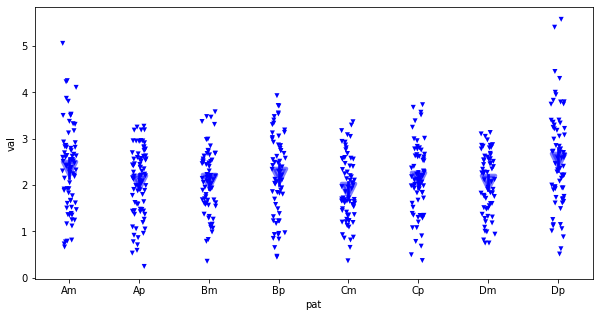

In [81]:
res_train_df = plot_patterns_separated_without_labels(transformed_train_df)

In [82]:
def plotting_hist(res_df):
    patterns = ["Am", "Ap", "Bm", "Bp", "Cm", "Cp", "Dm", "Dp"]

    plt.rc('axes', labelsize=14) 
    f, axs = plt.subplots(4, 2, figsize=(11, 22))

    for i, pat in enumerate(patterns):
        axs[i%4,int(i/4)].hist(res_df[(res_df.label==0) & (res_df.pat==pat)].val, alpha=0.5)
        axs[i%4,int(i/4)].hist(res_df[(res_df.label==1) & (res_df.pat==pat)].val, alpha=0.5)

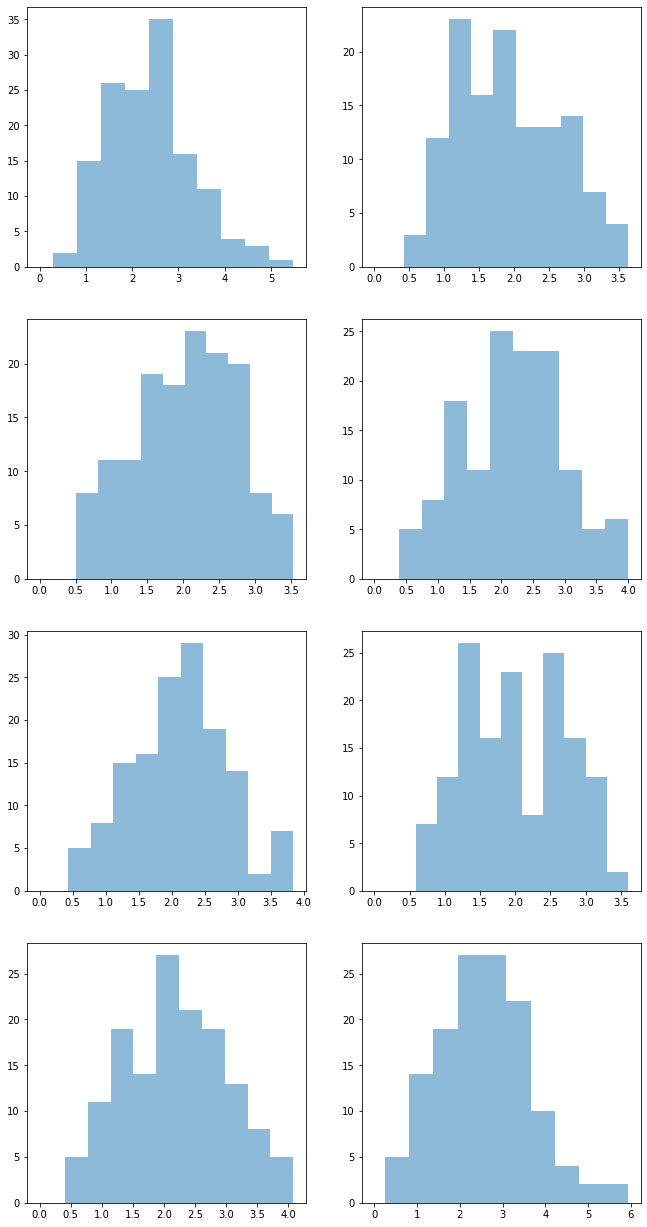

In [83]:
res0_df = res_df.copy()
res0_df.label=0
plotting_hist(res0_df)

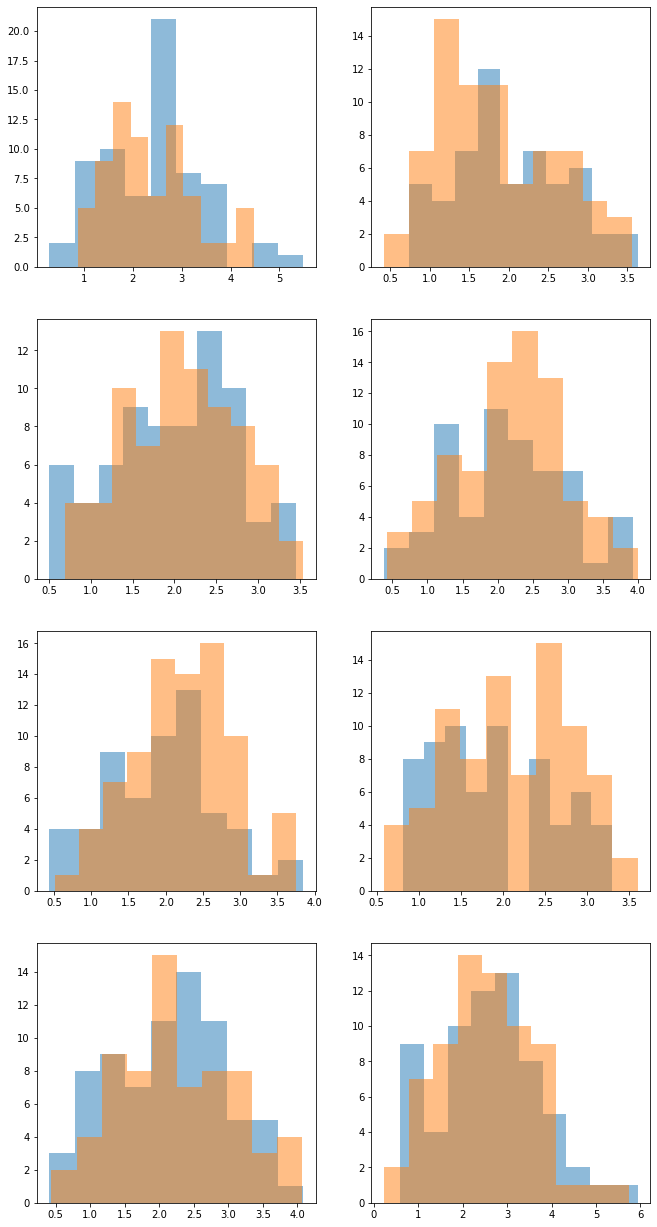

In [84]:
plotting_hist(res_df)

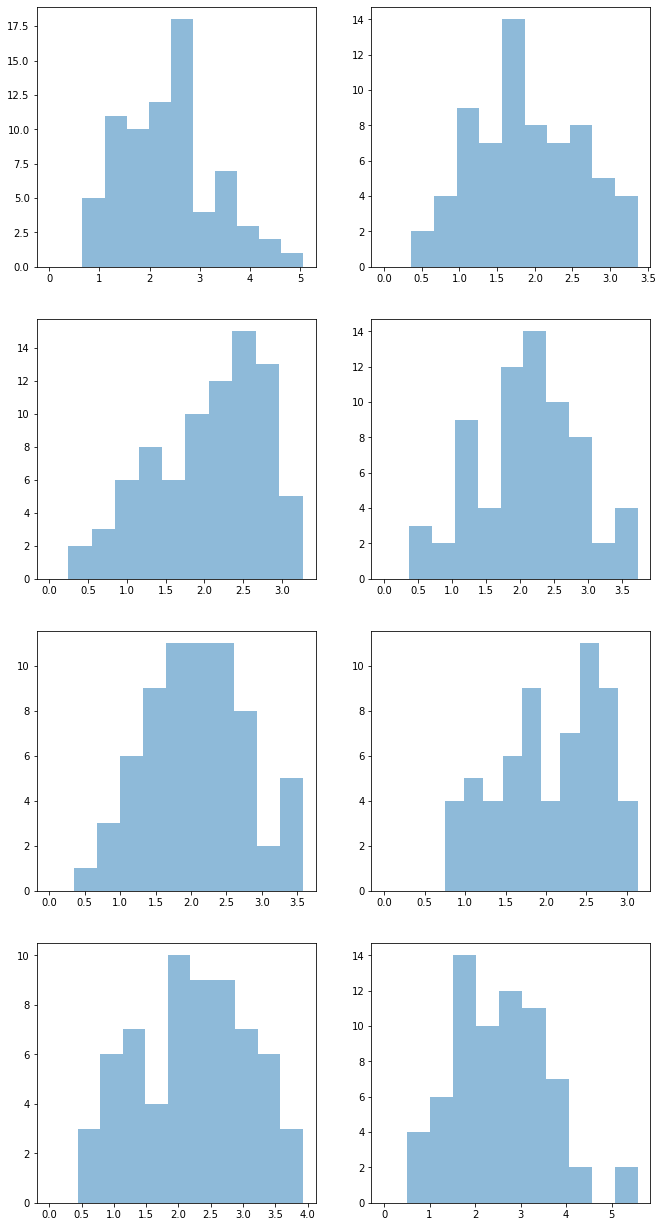

In [85]:
plotting_hist(res_train_df)

Mean label = 0.5370705244122965


array([0.52173913, 0.51034483, 0.58571429, 0.47887324, 0.56692913,
       0.57037037, 0.55782313, 0.50757576])

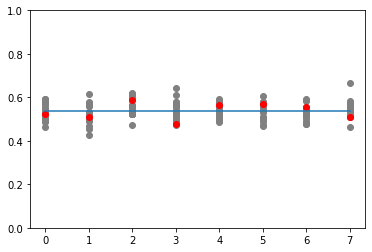

In [86]:
plot_predictions(prediction_df, transformed_df)

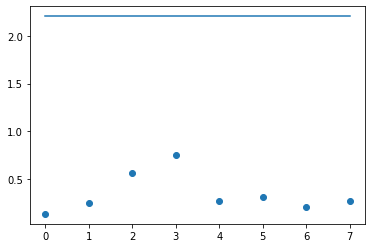

In [87]:
res_p = do_t_test(prediction_df, transformed_df, nb_components=4)

(0, 0.0, 0, 0)

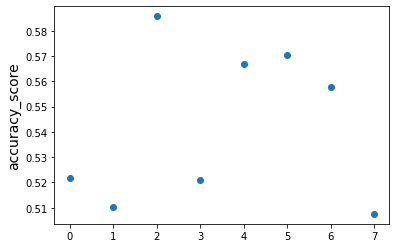

In [88]:
give_number_relevant_subjects_accuracy(prediction_df, transformed_df, res_p, nb_components=4)

## Visualize umap

In [89]:
def compute_umap(df):
    # apply umap
    reducer = umap.UMAP()
    visual_embs = reducer.fit_transform(df)
    return visual_embs, reducer

In [90]:
def display_umaps_true_labels(visual_embs_train, reducer, test_df, prediction_df, verbose=False):
    if verbose:
        print("Test df:")
        print(test_df[:5])
        print("Prediction df:")
        print(prediction_df[:5])

    # apply umap
    if verbose:
        print("UMAP embeddings")
        print(visual_embs_train.shape)
        print(visual_embs_train[:5])
    visual_embs_test = reducer.transform(test_df)

    ## plot the graphs

    plt.figure()
    plt.scatter(visual_embs_train[:,0], visual_embs_train[:,1], c='green', alpha=0.1)

    # plot for true labels
    cmap = ['b', 'r']
    colors = [cmap[i] for i in prediction_df.label]

    plt.scatter(visual_embs_test[:,0], visual_embs_test[:,1], c=colors, alpha=0.6)
    plt.title("True labels")
    plt.show()
    
    plt.show()

    return pd.DataFrame(visual_embs_test, index=test_df.index.values)

In [114]:
prediction_df.head()

,label,predicted_0,predicted_1,predicted_2,predicted_3,predicted_4,predicted_5,predicted_6,predicted_7,predicted_8,...,predicted_243,predicted_244,predicted_245,predicted_246,predicted_247,predicted_248,predicted_249,median_pred,mean_pred,average_model
Subject,,,,,,,,,,,,,,,,,,,,,
100206,0,0.500000,0.545832,0.511126,0.518482,0.510937,0.532778,0.540902,0.535986,0.534060,...,0.540732,0.522403,0.549788,0.532984,0.527355,0.546415,0.555782,0.534046,0.533972,0.526872
100307,1,0.613436,0.522580,0.585469,0.576527,0.587817,0.546535,0.530392,0.540008,0.543915,...,0.530261,0.566842,0.512621,0.545676,0.558064,0.519480,0.500000,0.543953,0.543852,0.557588
100408,0,0.553342,0.534885,0.546241,0.545889,0.547250,0.539264,0.535952,0.537882,0.538706,...,0.535800,0.543378,0.532299,0.538968,0.541843,0.533736,0.528378,0.538708,0.538680,0.541364
100610,1,0.500000,0.546164,0.510057,0.517647,0.509831,0.532581,0.541052,0.535929,0.533919,...,0.540882,0.521765,0.550319,0.532802,0.526915,0.546799,0.556613,0.533898,0.533828,0.526431
101006,1,0.543582,0.536879,0.539861,0.540908,0.540653,0.538084,0.536853,0.537537,0.537860,...,0.536699,0.539565,0.535486,0.537879,0.539208,0.536046,0.533375,0.537850,0.537833,0.538728


In [103]:
visual_embs, reducer = compute_umap(test_df)

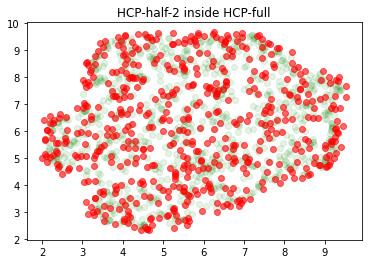

In [111]:
    visual_embs_train = reducer.transform(train_df)

    ## plot the graphs

    plt.figure()
    plt.scatter(visual_embs[:,0], visual_embs[:,1], c='green', alpha=0.1)

    plt.scatter(visual_embs_train[:,0], visual_embs_train[:,1], c='red', alpha=0.6)
    plt.title("HCP-half-2 inside HCP-full")
    plt.show()

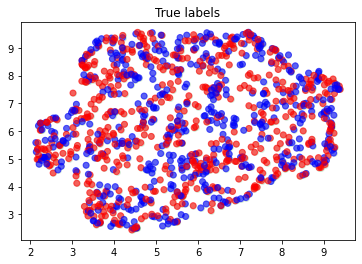

In [104]:
df_umap = display_umaps_true_labels(visual_embs, reducer, test_df, prediction_df, verbose=False)

In [105]:
transformed_df.head()

,trans_0,trans_1,trans_2,trans_3
ID,,,,
100206,0.000000,0.000000,-2.772519,0.0
100307,0.000000,2.230304,0.000000,0.0
100408,0.000000,0.000000,-0.734586,0.0
100610,0.000000,-1.866419,0.000000,0.0
101006,-2.559208,0.000000,0.000000,0.0


In [106]:
transformed_df2 = transformed_df.copy()

In [107]:
transformed_df2["label"] = transformed_df.trans_2.apply(lambda x: 1 if x > 0. else 0)

In [108]:
transformed_df2.head()

,trans_0,trans_1,trans_2,trans_3,label
ID,,,,,
100206,0.000000,0.000000,-2.772519,0.0,0
100307,0.000000,2.230304,0.000000,0.0,0
100408,0.000000,0.000000,-0.734586,0.0,0
100610,0.000000,-1.866419,0.000000,0.0,0
101006,-2.559208,0.000000,0.000000,0.0,0


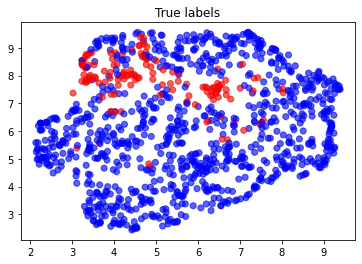

In [109]:
df_umap = display_umaps_true_labels(visual_embs, reducer, test_df, transformed_df2, verbose=False)

## Correspondance des sujets ACCpatterns

In [98]:
transformed_df2[transformed_df2.label==1].index

Int64Index([103212, 105115, 105620, 108121, 109325, 111312, 111716, 112314,
            112819, 113316,
            ...
            869472, 871762, 872158, 882161, 887373, 899885, 902242, 930449,
            973770, 996782],
           dtype='int64', name='ID', length=135)

In [99]:
transformed_df2[transformed_df2.label==1]

,trans_0,trans_1,trans_2,trans_3,label
ID,,,,,
103212,0.0,0.0,0.934554,0.0,1
105115,0.0,0.0,3.193902,0.0,1
105620,0.0,0.0,2.773991,0.0,1
108121,0.0,0.0,2.458077,0.0,1
109325,0.0,0.0,1.140009,0.0,1
...,...,...,...,...,...
899885,0.0,0.0,2.724358,0.0,1
902242,0.0,0.0,1.397189,0.0,1
930449,0.0,0.0,1.063082,0.0,1


In [100]:
prediction_df[transformed_df2.label==1]

,label,predicted_0,predicted_1,predicted_2,predicted_3,predicted_4,predicted_5,predicted_6,predicted_7,predicted_8,...,predicted_243,predicted_244,predicted_245,predicted_246,predicted_247,predicted_248,predicted_249,median_pred,mean_pred,average_model
Subject,,,,,,,,,,,,,,,,,,,,,
103212,0,0.574945,0.530461,0.560365,0.556921,0.561856,0.541880,0.533952,0.538646,0.540580,...,0.533808,0.551826,0.525226,0.541382,0.547682,0.528611,0.517285,0.540599,0.540516,0.547204
105115,0,0.553152,0.534924,0.546117,0.545792,0.547122,0.539241,0.535969,0.537875,0.538689,...,0.535818,0.543304,0.532361,0.538947,0.541792,0.533781,0.528475,0.538691,0.538663,0.541312
105620,1,0.500000,0.545428,0.512424,0.519495,0.512279,0.533017,0.540719,0.536056,0.534231,...,0.540551,0.523178,0.549144,0.533205,0.527890,0.545947,0.554773,0.534226,0.534174,0.527407
108121,1,0.523025,0.541068,0.526434,0.530427,0.526768,0.535602,0.538747,0.536812,0.536083,...,0.538586,0.531543,0.542180,0.535590,0.533667,0.540898,0.543865,0.536075,0.536044,0.533185
109325,0,0.544345,0.536723,0.540359,0.541297,0.541169,0.538176,0.536783,0.537564,0.537926,...,0.536628,0.539863,0.535237,0.537964,0.539414,0.535866,0.532985,0.537929,0.537899,0.538933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899885,1,0.519972,0.543281,0.546222,0.566164,0.558729,0.546048,0.547971,0.562074,0.557807,...,0.524735,0.567578,0.531019,0.556481,0.547660,0.594815,0.552071,0.544701,0.546030,0.550426
902242,0,0.531094,0.539441,0.540486,0.548543,0.544570,0.539974,0.540919,0.546853,0.544090,...,0.532208,0.549173,0.534606,0.544252,0.541022,0.557826,0.542235,0.539788,0.540295,0.542042
930449,1,0.518723,0.543712,0.546865,0.568139,0.560316,0.546729,0.548761,0.563779,0.559344,...,0.523896,0.569640,0.530617,0.557851,0.548404,0.598969,0.553174,0.545244,0.546671,0.551366


In [101]:
prediction_df[transformed_df2.trans_1 > 0.]

,label,predicted_0,predicted_1,predicted_2,predicted_3,predicted_4,predicted_5,predicted_6,predicted_7,predicted_8,...,predicted_243,predicted_244,predicted_245,predicted_246,predicted_247,predicted_248,predicted_249,median_pred,mean_pred,average_model
Subject,,,,,,,,,,,,,,,,,,,,,
100307,1,0.613436,0.522580,0.585469,0.576527,0.587817,0.546535,0.530392,0.540008,0.543915,...,0.530261,0.566842,0.512621,0.545676,0.558064,0.519480,0.500000,0.543953,0.543852,0.557588
101107,1,0.617207,0.521810,0.587919,0.578440,0.590351,0.546988,0.530045,0.540140,0.544241,...,0.529915,0.568306,0.511390,0.546095,0.559076,0.518589,0.500000,0.544281,0.544231,0.558601
101309,1,0.561689,0.533177,0.551698,0.550151,0.552893,0.540274,0.535180,0.538177,0.539430,...,0.535031,0.546642,0.529568,0.539900,0.544099,0.531757,0.524096,0.539441,0.539403,0.543620
102008,0,0.588925,0.527595,0.569499,0.564056,0.571301,0.543574,0.532658,0.539142,0.541794,...,0.532518,0.557291,0.520643,0.542944,0.551460,0.525291,0.510096,0.541819,0.541738,0.550983
102614,1,0.617950,0.521659,0.588400,0.578816,0.590849,0.547078,0.529977,0.540167,0.544305,...,0.529847,0.568594,0.511148,0.546177,0.559275,0.518413,0.500000,0.544345,0.544301,0.558800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889579,0,0.517840,0.544016,0.547320,0.569535,0.561438,0.547211,0.549320,0.564986,0.560431,...,0.523303,0.571099,0.530333,0.558821,0.548930,0.601908,0.553953,0.545636,0.547120,0.552031
896778,0,0.521855,0.542632,0.545252,0.563185,0.556335,0.545021,0.546778,0.559500,0.555488,...,0.526000,0.564466,0.531626,0.554413,0.546537,0.588554,0.550408,0.543892,0.545071,0.549008
932554,0,0.516392,0.544516,0.548066,0.571824,0.563277,0.548000,0.550237,0.566963,0.562213,...,0.522330,0.573490,0.529866,0.560409,0.549793,0.606731,0.555231,0.546279,0.547877,0.553120
